**Breast_Cancer classification(98 % Accuracy)**

In [1]:
# Imported the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore all warning messages that may arise during the execution
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To load the dataset in dataframe
df = pd.read_csv("breast-cancer.csv")

In [3]:
# Displays the first 5 rows of the dataset, which can provide information such as the column names or the pattern of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Displays randomly selected number of rows from the dataset
df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
415,905686,B,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.02179,...,13.05,27.21,85.09,522.9,0.1426,0.21870,0.11640,0.08263,0.3075,0.07351
201,877989,M,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.07488,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.35080,0.19390,0.2928,0.07867
179,873586,B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
455,9112085,B,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.03264,...,15.05,41.61,96.69,705.6,0.1172,0.14210,0.07003,0.07763,0.2196,0.07675
54,857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.03334,...,18.10,31.69,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873
418,906024,B,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.02402,...,13.65,16.92,88.12,566.9,0.1314,0.16070,0.09385,0.08224,0.2775,0.09464
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,...,14.73,21.70,93.76,663.5,0.1213,0.16760,0.13640,0.06987,0.2741,0.07582


In [5]:
# Specifies the shape (number of rows and columns), In this dataset there are 569 rows and 32 columns
df.shape

(569, 32)

In [6]:
# Provides the statistical description of only numeric column in the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Provides information such as data-type of the column and checks for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# It provides the unique number of data points present in each column
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [10]:
# Another way to check the total number of null values in the dataset
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

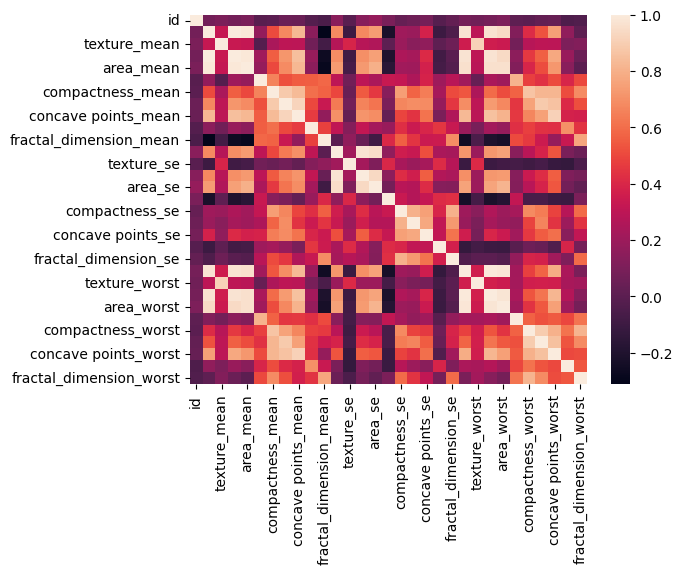

In [11]:
# The heatmap provides the correlation between the columns
# Each column is highly correlated with itself
sns.heatmap(df.corr())

In [12]:
# Displays the corelation with  a value for better understanding
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [13]:
# Droped the ID column as it does not add value to the dataset and is not relevant to the context
df.drop(["id"],axis=1,inplace=True)

In [14]:
# The ID column is successfully dropped amd displayed the remaining column
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

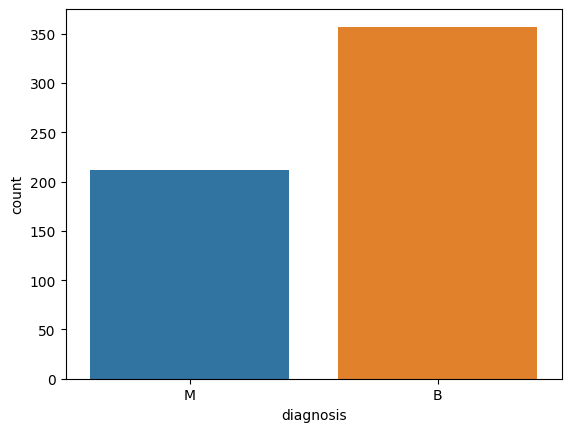

In [16]:
# Countplot, which represents the number of malignant and benign tumor count present in the dataset of breast cancer
# M - Malignant & B - Benign
# people have more benign tumor than malignant tumor.
sns.countplot(data=df,x="diagnosis")

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Label Encoder is used to encode categorical column to numerical column.
le = LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [19]:
# this shows that the column diagnosis is successfully encoded to numeric value, in the form of 0 and 1
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Now X is independent column, Y is the dependent column or (target) column.
# The X value consist of various features related to breast cancer, which will help to train our model
# The Y column is our target column(diagnosis), which will help to classify into two dictinct categories.

x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
# Next for training the model, fitted and transformed the training data, and transformed the testing data.
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [25]:
# Imported the required libraries to create a aritificial neural network,
# This network will allow to create the input, hidden and output layer of the network.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Initialize the neural network
model = Sequential()

# Input layer with 20 neurons and relu activation function
model.add(Dense(units=20, activation="relu"))

# Hidden layer with 15 neurons and relu activation function
model.add(Dense(units=15, activation="relu"))

# Output layer consist of only 1 neuron and sigmoid activation function as it is binary classification
model.add(Dense(units=1, activation = "sigmoid"))


# Compiled the model with adam optimizer and displayed the loss
model.compile(optimizer="adam",loss = "binary_crossentropy")

# Neural network training
model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest))

Epoch 1/200
15/15 [==============================] - 1s 13ms/step - loss: 0.4813 - val_loss: 0.4030
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.3260 - val_loss: 0.3037
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2367 - val_loss: 0.2472
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1855 - val_loss: 0.2107
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1522 - val_loss: 0.1842
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1300 - val_loss: 0.1656
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.1528
Epoch 8/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 0.1416
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 0.1337
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0843 - val_loss: 0.1262
Epoch 11

In [27]:
# history specifies the loss and validation value of our neural network
lossdf = pd.DataFrame(model.history.history)

In [28]:
lossdf.head()

,loss,val_loss
0,0.481344,0.403040
1,0.326047,0.303742
2,0.236749,0.247220
3,0.185538,0.210681
4,0.152180,0.184235


In [29]:
lossdf.tail()

,loss,val_loss
195,0.000364,0.182911
196,0.000361,0.182866
197,0.000354,0.183464
198,0.000347,0.183725
199,0.000348,0.183880


<Axes: >

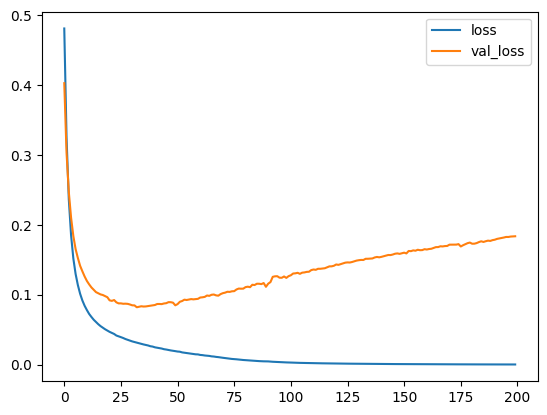

In [30]:
lossdf.plot()

In [34]:
model = Sequential()

model.add(Dense(units=20, activation="relu"))

model.add(Dense(units=15, activation="relu"))

model.add(Dense(units=1, activation = "sigmoid"))


model.compile(optimizer="adam",loss = "binary_crossentropy")

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
earlystopping = EarlyStopping(monitor = "val_loss",mode="min",verbose=1,patience=25)

model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest),callbacks=[earlystopping])

Epoch 1/200
15/15 [==============================] - 1s 14ms/step - loss: 0.7072 - val_loss: 0.6093
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4728 - val_loss: 0.4581
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.3463 - val_loss: 0.3697
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2715 - val_loss: 0.3101
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2189 - val_loss: 0.2715
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1832 - val_loss: 0.2416
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1573 - val_loss: 0.2187
Epoch 8/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1385 - val_loss: 0.2014
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1247 - val_loss: 0.1854
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1131 - val_loss: 0.1717
Epoch 11

In [37]:
lossdf = pd.DataFrame(model.history.history)

<Axes: >

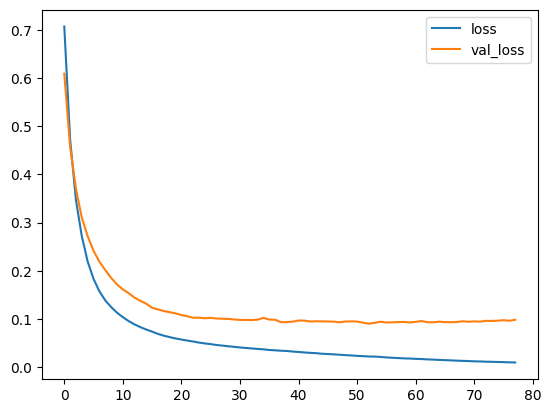

In [38]:
lossdf.plot()

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()


model.add(Dense(units=20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation = "sigmoid"))


model.compile(optimizer="adam",loss = "binary_crossentropy")

In [42]:
earlystopping = EarlyStopping(monitor = "val_loss",mode="min",verbose=1,patience=25)

model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest),callbacks=[earlystopping])

Epoch 1/200
15/15 [==============================] - 1s 13ms/step - loss: 0.7426 - val_loss: 0.6523
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6059 - val_loss: 0.5587
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5577 - val_loss: 0.4820
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4713 - val_loss: 0.4222
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4643 - val_loss: 0.3739
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4188 - val_loss: 0.3323
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3667 - val_loss: 0.2952
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3423 - val_loss: 0.2641
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3099 - val_loss: 0.2387
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2722 - val_loss: 0.2170
Epoch 11

In [43]:
lossdf = pd.DataFrame(model.history.history)

<Axes: >

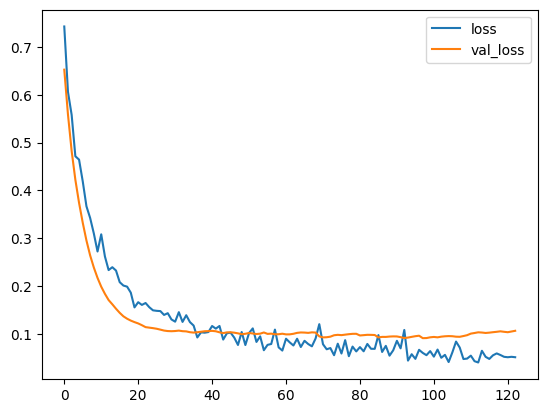

In [44]:
lossdf.plot()

In [45]:
lossdf.head()

,loss,val_loss
0,0.742599,0.652315
1,0.605916,0.558674
2,0.557656,0.482044
3,0.471267,0.422243
4,0.464281,0.373920


In [46]:
lossdf.tail()

,loss,val_loss
118,0.055877,0.105376
119,0.052077,0.104339
120,0.051213,0.103501
121,0.052071,0.104995
122,0.051237,0.106451


In [49]:
# After completion of the training, predicted the output i.e the target variable on the testing dataset.
ypred = model.predict(xtest)
ypred=model.predict(xtest)
ypred = ypred > 0.5

4/4 [==============================] - 0s 2ms/step


In [50]:
from sklearn.metrics import classification_report

In [51]:
# Printed the classification report, which has specified the overall accuracy of the model, also the accuracy of diagnosis(0 & 1)
# The overall accuracy of model is 98%, the accuracy to predict only Malignant(1) tumor is 98%,
# and to predict the Benign(0) tumor is 99%.

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [52]:
from sklearn.metrics import confusion_matrix

# A confusion matrix is a tabular representation that shows,
# the count of correct and incorrect predictions made by classification model

In [53]:
# to create the confusion matrix, we need to pass the value for prediction, so
# we need to pass the testing data and the predicted data of the targeted column.
conf_matrix = confusion_matrix(ytest,ypred, labels=[0,1])
conf_matrix

array([[72,  0],
       [ 2, 40]])

In [54]:
# array([[72,  0], this it confusion matrix I got.
#       [ 2, 40]]
# this specifies that there are 72 true positive, 40 true negative and 2 false positive, 0 false negative.

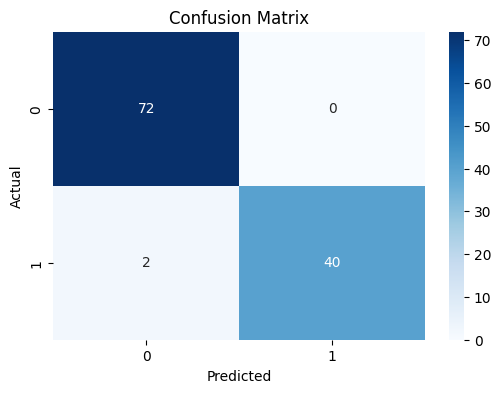

In [55]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
